In [2]:
# Import libraries needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from matplotlib.pyplot import figure

In [3]:
# Upload data set
stop_and_search_df = pd.read_csv("2021-12-merseyside-stop-and-search.csv")
stop_and_search_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2936 entries, 0 to 2935
Data columns (total 15 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Type                                      2936 non-null   object 
 1   Date                                      2936 non-null   object 
 2   Part of a policing operation              0 non-null      float64
 3   Policing operation                        0 non-null      float64
 4   Latitude                                  2806 non-null   float64
 5   Longitude                                 2806 non-null   float64
 6   Gender                                    2785 non-null   object 
 7   Age range                                 2782 non-null   object 
 8   Self-defined ethnicity                    2877 non-null   object 
 9   Officer-defined ethnicity                 2718 non-null   object 
 10  Legislation                         

In [4]:
stop_and_search_df.head()

,Type,Date,Part of a policing operation,Policing operation,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Outcome linked to object of search,Removal of more than just outer clothing
0,Person and Vehicle search,2021-12-01T00:22:23+00:00,NaN,NaN,53.386456,-3.056396,Female,Oct-17,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,A no further action disposal,NaN,False
1,Person and Vehicle search,2021-12-01T00:25:23+00:00,NaN,NaN,53.386456,-3.056396,Male,Oct-17,White - English/Welsh/Scottish/Northern Irish/...,White,NaN,NaN,A no further action disposal,NaN,False
2,Person and Vehicle search,2021-12-01T00:27:58+00:00,NaN,NaN,53.429291,-2.947949,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),NaN,Arrest,NaN,False
3,Person search,2021-12-01T00:31:09+00:00,NaN,NaN,53.450024,-2.711851,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,Community resolution,NaN,False
4,Person search,2021-12-01T00:56:41+00:00,NaN,NaN,53.403024,-2.979358,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,NaN,NaN


In [5]:
# Begin cleaning the data set

# Delete columns that are not filled in
stop_and_search_df.drop(stop_and_search_df.columns[[2,3,11,13]], axis=1, inplace=True)

# Change Date to just the date without time
pd.to_datetime(stop_and_search_df.Date)
stop_and_search_df['new_date'] = pd.to_datetime(stop_and_search_df['Date']).dt.date

# Delete rows where data is missing
stop_and_search_df.dropna(inplace=True)
stop_and_search_df.drop_duplicates()
stop_and_search_df.head()

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Outcome,Removal of more than just outer clothing,new_date
2,Person and Vehicle search,2021-12-01T00:27:58+00:00,53.429291,-2.947949,Male,25-34,Mixed/Multiple ethnic groups - Any other Mixed...,Black,Misuse of Drugs Act 1971 (section 23),Arrest,False,2021-12-01
3,Person search,2021-12-01T00:31:09+00:00,53.450024,-2.711851,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Community resolution,False,2021-12-01
5,Person search,2021-12-01T01:05:24+00:00,53.459508,-2.745491,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),A no further action disposal,False,2021-12-01
6,Person search,2021-12-01T01:28:36+00:00,53.387767,-3.032957,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),A no further action disposal,False,2021-12-01
7,Person search,2021-12-01T01:38:58+00:00,53.445658,-2.991360,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),A no further action disposal,False,2021-12-01


In [6]:
# Check unique values of columns to check inputs are correct
# Can not do this with the other three columns as all inputs could be unique
stop_and_search_columns = ["Type", "Gender", "Age range", 
                           "Self-defined ethnicity",
                           "Officer-defined ethnicity", "Legislation", "Outcome",
                           "Removal of more than just outer clothing"]

for unique_column in stop_and_search_columns:
    print(stop_and_search_df[str(unique_column)].unique())

['Person and Vehicle search' 'Person search']
['Male' 'Female' 'Other']
['25-34' '18-24' 'over 34' 'Oct-17']
['Mixed/Multiple ethnic groups - Any other Mixed/Multiple ethnic background'
 'White - English/Welsh/Scottish/Northern Irish/British'
 'Other ethnic group - Not stated'
 'Mixed/Multiple ethnic groups - White and Asian'
 'Black/African/Caribbean/Black British - Caribbean' 'White - Irish'
 'White - Any other White background'
 'Asian/Asian British - Any other Asian background'
 'Black/African/Caribbean/Black British - Any other Black/African/Caribbean background'
 'Black/African/Caribbean/Black British - African'
 'Mixed/Multiple ethnic groups - White and Black African'
 'Mixed/Multiple ethnic groups - White and Black Caribbean'
 'Other ethnic group - Any other ethnic group'
 'Asian/Asian British - Bangladeshi' 'Asian/Asian British - Indian'
 'Asian/Asian British - Pakistani']
['Black' 'White' 'Asian' 'Other']
['Misuse of Drugs Act 1971 (section 23)'
 'Police and Criminal Evidence

In [7]:
# We see from the above output that in the Age range column some dates were
# added. We will then remove these and check that they were removed.
stop_and_search_df.rename(columns={"Age range": "Age_range"}, inplace=True)

stop_and_search_df = stop_and_search_df[
    stop_and_search_df.Age_range != "Oct-17"]

print(stop_and_search_df["Age_range"].unique())

['25-34' '18-24' 'over 34']


In [8]:
# Now that the data is done being cleaned we will save it in csv format
stop_and_search_df.to_csv("2021-12-merseyside-stop-and-search_cleaned.csv",
                           index=False)

In [9]:
stop_and_search_df["Age_range"].value_counts()

over 34    803
18-24      702
25-34      622
Name: Age_range, dtype: int64

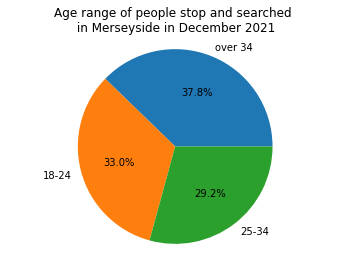

In [10]:
my_labels = "over 34", "18-24", "25-34"
plt.pie(stop_and_search_df["Age_range"].value_counts(),
 labels=my_labels,autopct="%1.1f%%")
plt.title("Age range of people stop and searched \n in Merseyside in December 2021")
plt.axis("equal")
plt.show()


In [11]:
stop_and_search_df["Gender"].value_counts()

Male      1931
Female     196
Name: Gender, dtype: int64

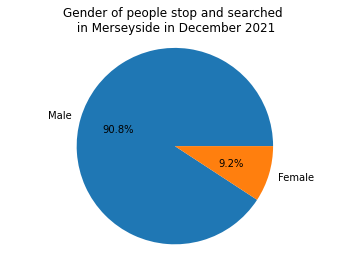

In [12]:
my_labels = "Male", "Female"
plt.pie(stop_and_search_df["Gender"].value_counts(),
 labels=my_labels,autopct="%1.1f%%")
plt.title("Gender of people stop and searched \n in Merseyside in December 2021")
plt.axis("equal")
plt.show()

In [13]:
stop_and_search_df["Type"].value_counts()

Person search                1711
Person and Vehicle search     416
Name: Type, dtype: int64

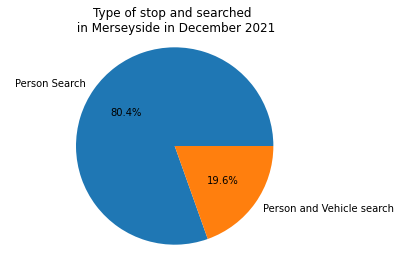

In [14]:
my_labels = "Person Search", "Person and Vehicle search"
plt.pie(stop_and_search_df["Type"].value_counts(),
 labels=my_labels,autopct="%1.1f%%")
plt.title("Type of stop and searched \n in Merseyside in December 2021")
plt.axis("equal")
plt.show()

In [15]:
pd.crosstab(stop_and_search_df.Gender, stop_and_search_df.Outcome)

Outcome,A no further action disposal,Arrest,Caution (simple or conditional),Community resolution,Khat or Cannabis warning,Penalty Notice for Disorder,Summons / charged by post
Gender,,,,,,,
Female,156,12,0,23,1,0,4
Male,1453,176,10,213,6,1,72


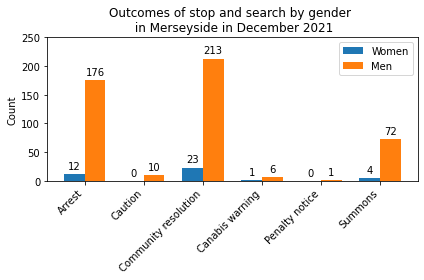

In [16]:


labels = ['Arrest', 'Caution', 'Community resolution', 'Canabis warning', 'Penalty notice', 'Summons']
female_count = [12, 0, 23, 1, 0, 4]
male_count = [176, 10, 213, 6, 1, 72]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, female_count, width, label='Women')
rects2 = ax.bar(x + width/2, male_count, width, label='Men')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Outcomes of stop and search by gender \n in Merseyside in December 2021')
ax.set_xticks(x, labels)
ax.legend()
plt.xticks(rotation=45, ha='right') # ha is horizontal alignment

ax = plt.gca()
ax.set_ylim([0, 250])

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [17]:
pd.crosstab(stop_and_search_df.Type, stop_and_search_df.Age_range)

Age_range,18-24,25-34,over 34
Type,,,
Person and Vehicle search,118,160,138
Person search,584,462,665


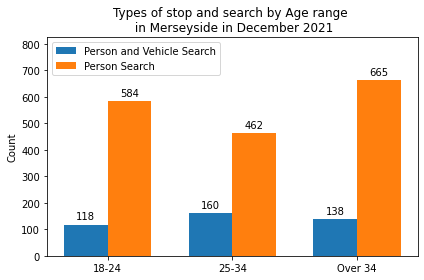

In [18]:
labels = ['18-24', '25-34', 'Over 34']
person_vehicle_search = [118, 160, 138]
person_search = [584, 462, 665]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, person_vehicle_search, width, label='Person and Vehicle Search')
rects2 = ax.bar(x + width/2, person_search, width, label='Person Search')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Count')
ax.set_title('Types of stop and search by Age range \n in Merseyside in December 2021')
ax.set_xticks(x, labels)
ax.legend()
plt.xticks(rotation=0)

ax = plt.gca()
ax.set_ylim([0, 825])

plt.legend(loc='upper left')

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.tight_layout()

plt.show()

In [19]:
date_df = stop_and_search_df[
    "new_date"].value_counts().rename_axis("date").reset_index(name="counts")
date_df = date_df.sort_values(by="date")

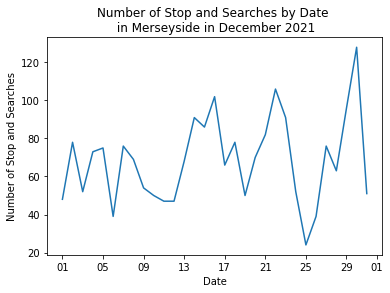

In [20]:
plt.plot(date_df.date, date_df.counts)

plt.xticks(rotation=0)

plt.title("Number of Stop and Searches by Date \n in Merseyside in December 2021")
plt.xlabel("Date")
plt.ylabel("Number of Stop and Searches")

dtFmt = mdates.DateFormatter('%d')
plt.gca().xaxis.set_major_formatter(dtFmt)

plt.show()